#Question 1

Cars24 is the most popular website of used vehicles for sale, yet it's very difficult to
collect all of them in the same place. Among all cities, data from 5 major cities which
include Hyderabad, New Delhi, Mumbai, Bangalore, and Chennai is collected. Develop
an algorithm for predict price of car.

Data link: https://www.kaggle.com/balajimummidi/used-cars-in-cars24

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
df = pd.read_csv('Cars24.csv', index_col=0)
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


In [ ]:
df.dropna(inplace=True)
df

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642
...,...,...,...,...,...,...,...,...,...,...
5913,Toyota,Fortuner3.0 AT 4X2,1234899,2012,Chennai,Diesel,197177,Automatic,1,27470
5914,Toyota,Innova2.5 VX 8 STR BS IV,892699,2012,Chennai,Diesel,115553,Manual,2,19858
5915,Maruti,Wagon R 1.0VXI,381399,2014,Chennai,Petrol,24663,Manual,1,8484
5916,Hyundai,i10SPORTZ 1.2 KAPPA2 O,310899,2011,Chennai,Petrol,30159,Manual,1,6916


In [ ]:
def getVecForm(vocab, df):
    for i in range(len(vocab)):
        df.replace(vocab[i], i, inplace=True)
    return df

In [ ]:
df['Fuel'] = getVecForm(np.unique(df['Fuel']), df['Fuel'])
df['Car Brand'] = getVecForm(np.unique(df['Car Brand']), df['Car Brand'])
df['Model'] = getVecForm(np.unique(df['Model'].astype(str)), df['Model'])
df['Location'] = getVecForm(np.unique(df['Location']), df['Location'])
df['Gear'] = getVecForm(np.unique(df['Gear'].astype(str)), df['Gear'])
df

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,7,308,330399,2016,3,2,10674,1,2,7350
1,15,811,350199,2011,3,2,20979,1,1,7790
2,15,31,229199,2011,3,2,47330,1,2,5098
3,15,611,306399,2011,3,2,19662,1,1,6816
4,22,526,208699,2015,3,2,11256,0,1,4642
...,...,...,...,...,...,...,...,...,...,...
5913,23,373,1234899,2012,1,0,197177,0,1,27470
5914,23,453,892699,2012,1,0,115553,1,2,19858
5915,15,813,381399,2014,1,2,24663,1,1,8484
5916,7,884,310899,2011,1,2,30159,1,1,6916


In [ ]:
X = df.drop(['Price'], axis=1).to_numpy()
y = df['Price'].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000).fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
reg.score(X_test, y_test)

0.0008841732979664014

In [ ]:
print(mean_squared_error(y_test, y_pred, squared=False))

223357.67037352617


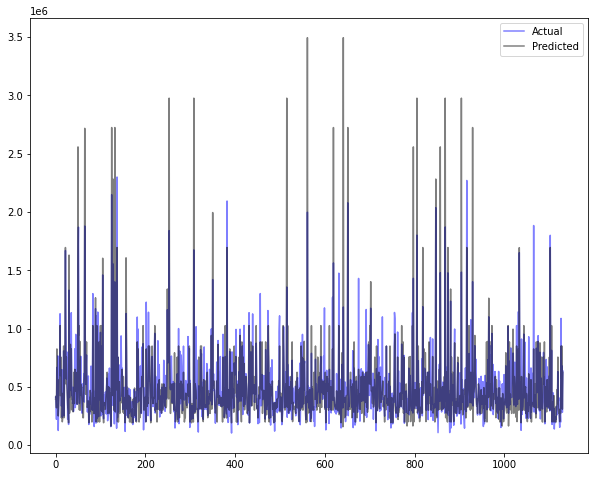

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(y_test, 'b', alpha=0.5, label='Actual')
plt.plot(y_pred, 'k', alpha=0.5, label='Predicted')
plt.legend()
plt.show()

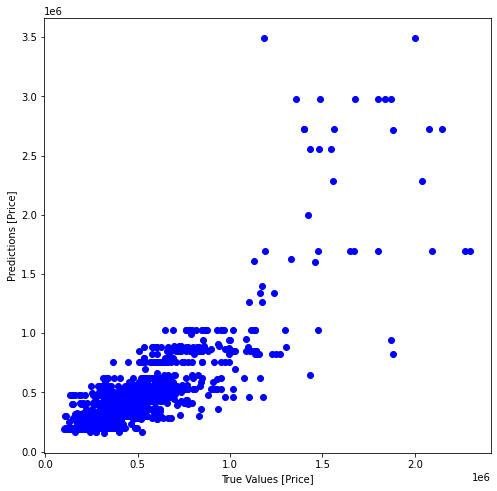

In [ ]:
plt.figure(figsize=[8,8])
plt.scatter(y_test, y_pred, color='b')
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.show()

In [ ]:
error = abs(y_test-y_pred)

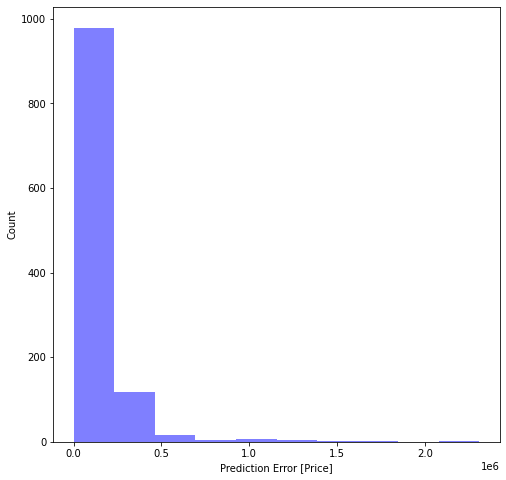

In [ ]:
plt.figure(figsize=[8,8])
plt.hist(error, bins = 10, color='b', alpha=0.5)
plt.xlabel("Prediction Error [Price]")
plt.ylabel("Count")
plt.show()

PCA followed by Logistic Regression 

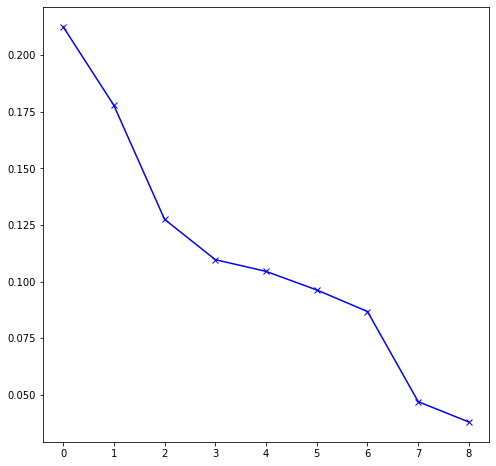

In [ ]:
pca = PCA(n_components=X.shape[1])
pca.fit_transform(X)
ex_var_ratio = pca.explained_variance_ratio_
    
plt.figure(figsize=[8,8])
plt.plot(ex_var_ratio, color='b', linestyle='-', marker='x')
plt.show()

In [ ]:
pca = PCA(n_components=3)
X_new = pca.fit_transform(X)
print(np.sum(pca.explained_variance_ratio_))

0.5177464662742188


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
reg.score(X_test, y_test)

0.0008841732979664014

In [ ]:
print(mean_squared_error(y_test, y_pred, squared=False))

189427.8861986012


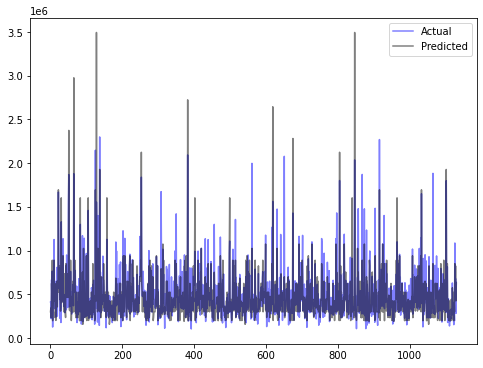

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(y_test, 'b', alpha=0.5, label='Actual')
plt.plot(y_pred, 'k', alpha=0.5, label='Predicted')
plt.legend()
plt.show()

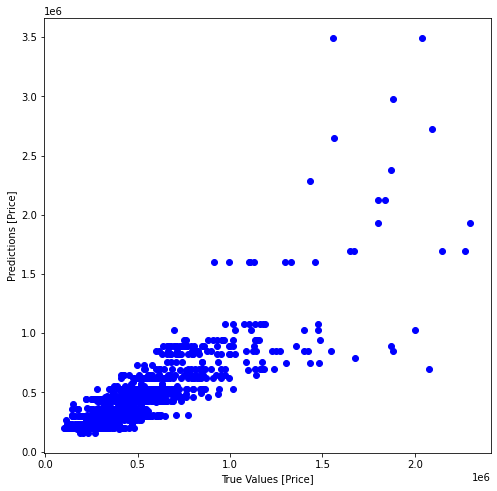

In [ ]:
plt.figure(figsize=[8,8])
plt.scatter(y_test, y_pred, color='b')
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.show()

In [ ]:
error = abs(y_test-y_pred)

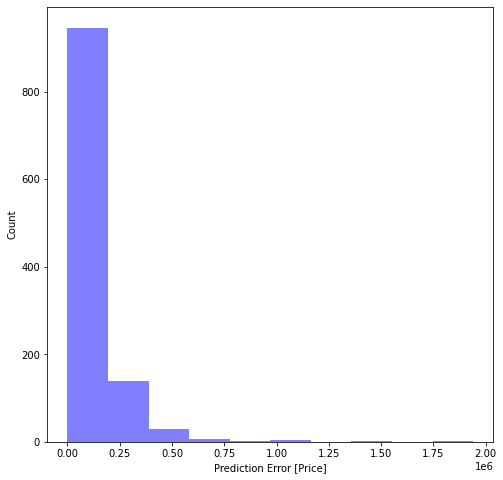

In [ ]:
plt.figure(figsize=[8,8])
plt.hist(error, bins = 10, color='b', alpha=0.5)
plt.xlabel("Prediction Error [Price]")
plt.ylabel("Count")
plt.show()

Stochastic Gradient Descent

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_samples, n_features = X_train.shape[0], X_train.shape[1]
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
reg.score(X_test, y_test)

0.9999999806600117

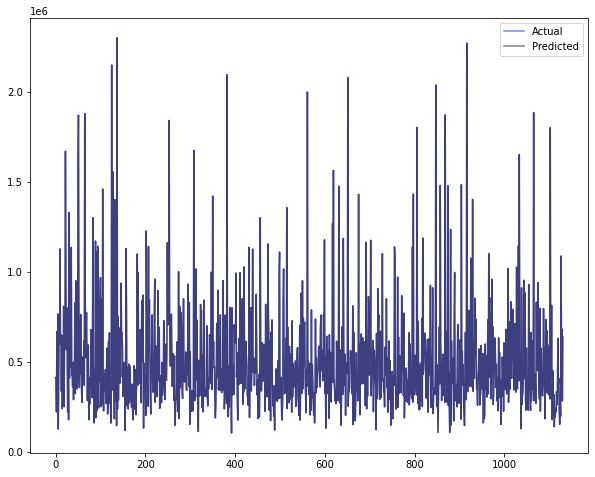

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(y_test, 'b', alpha=0.5, label='Actual')
plt.plot(y_pred, 'k', alpha=0.5, label='Predicted')
plt.legend()
plt.show()

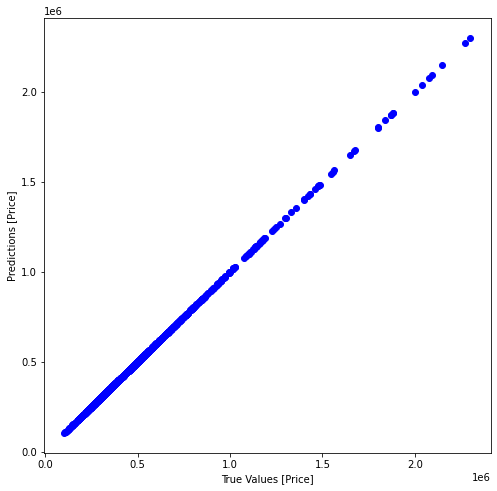

In [ ]:
plt.figure(figsize=[8,8])
plt.scatter(y_test, y_pred, color='b')
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.show()

In [ ]:
error = abs(y_test-y_pred)

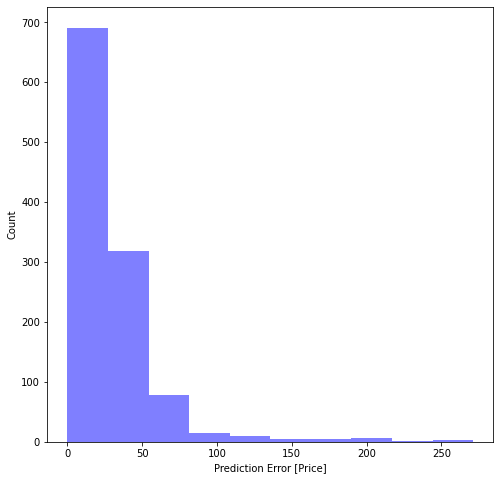

In [ ]:
plt.figure(figsize=[8,8])
plt.hist(error, bins = 10, color='b', alpha=0.5)
plt.xlabel("Prediction Error [Price]")
plt.ylabel("Count")
plt.show()

###Result

The graphs are shown above.

###Observation/Justification

The error in prediction of car price is highest for Logistic regression model with and without PCA.<br>
Stochastic GD and Neural Network models perform much better than original Logistic Regression model. This is clearly evident from the linear line, the slope of which is almost 1

#Question 2

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of
60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale
image, associated with a label from 10 classes. That means one image contains 784 pixel
and pixel-value is an integer between 0 and 255. Make a classification model to classify
the product.

Data link: https://www.kaggle.com/zalando-research/fashionmnist

#Answer

###Code

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import svm
import tensorflow as tf
import keras as keras

In [ ]:
training_images = pd.read_csv('fashion.csv')
training_labels = training_images['label']
training_images = training_images[training_images.columns[1:]]
test_images = pd.read_csv('fashion.csv')
test_labels = test_images['label']
test_images = test_images[test_images.columns[1:]]
training_images=StandardScaler().fit_transform(training_images)
test_images=StandardScaler().fit_transform(test_images)

SVM

In [ ]:
#Plot confusion matrix
def plot_confusion_matrix(title,y_test,y_pred):

    confusionMatrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(confusionMatrix,annot=True, fmt='.4g')
    plt.ylabel('True',fontsize=15)
    plt.xlabel('Predicted',fontsize=15)
    plt.title(title,fontsize=15)
    plt.show()
    print(classification_report(y_test,y_pred))

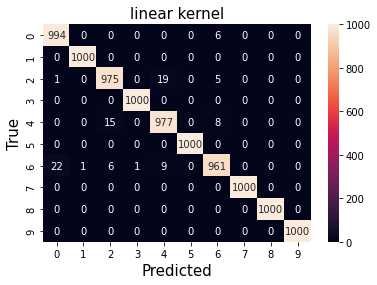

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1000
           1       1.00      1.00      1.00      1000
           2       0.98      0.97      0.98      1000
           3       1.00      1.00      1.00      1000
           4       0.97      0.98      0.97      1000
           5       1.00      1.00      1.00      1000
           6       0.98      0.96      0.97      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



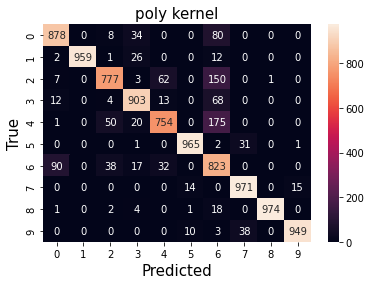

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1000
           1       1.00      0.96      0.98      1000
           2       0.88      0.78      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.88      0.75      0.81      1000
           5       0.97      0.96      0.97      1000
           6       0.62      0.82      0.71      1000
           7       0.93      0.97      0.95      1000
           8       1.00      0.97      0.99      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# SVM
def svm_func(x_train, x_test, y_train, y_test):
    k = ['linear', 'poly']
    for i in range(len(k)):
        clf = svm.SVC(kernel=k[i])
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        plot_confusion_matrix(k[i]+' kernel', y_test, y_pred)
    
svm_func(training_images, test_images, training_labels, test_labels)

Logistic Regression

In [ ]:
clf = LogisticRegression(max_iter=10000).fit(training_images, training_labels)
accuracy_inbuilt = accuracy_score(test_labels, clf.predict(test_images))
pred_data = clf.predict(test_images)

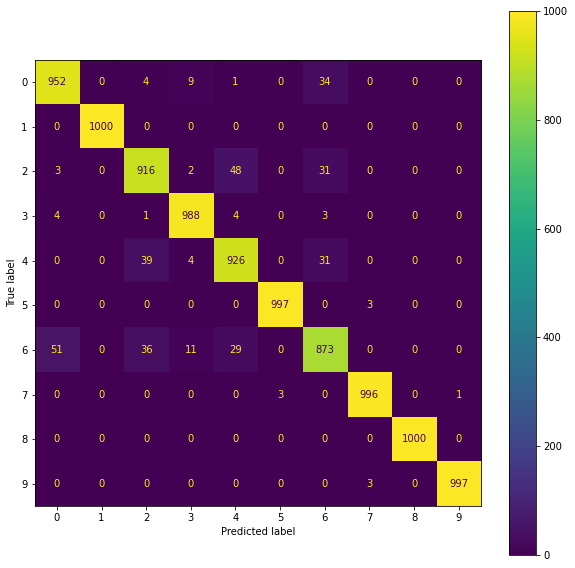

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1000
           1       1.00      1.00      1.00      1000
           2       0.92      0.92      0.92      1000
           3       0.97      0.99      0.98      1000
           4       0.92      0.93      0.92      1000
           5       1.00      1.00      1.00      1000
           6       0.90      0.87      0.89      1000
           7       0.99      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
cm = confusion_matrix(test_labels, pred_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()
print(classification_report(test_labels,pred_data))

Linear Discriminant Analysis

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(training_images, training_labels)
pred_data = clf.predict(test_images)

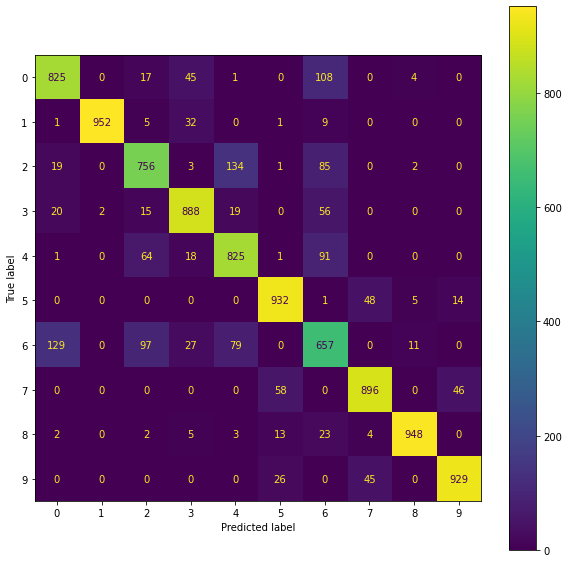

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1000
           1       1.00      0.95      0.97      1000
           2       0.79      0.76      0.77      1000
           3       0.87      0.89      0.88      1000
           4       0.78      0.82      0.80      1000
           5       0.90      0.93      0.92      1000
           6       0.64      0.66      0.65      1000
           7       0.90      0.90      0.90      1000
           8       0.98      0.95      0.96      1000
           9       0.94      0.93      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
cm = confusion_matrix(test_labels, pred_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()
print(classification_report(test_labels,pred_data))

###Result

The plots and graphs for SVM, Logistic Regression and Linear Discriminant Analysis is as shown above.

###Observation/Justification

The SVM linear kernel model performs the best among all the models chosen.